In [1]:
%load_ext autoreload
%autoreload 2

In [41]:
from os.path import join
import torch
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Patch

from clip_grounding.utils.paths import REPO_PATH
from clip_grounding.utils.io import load_json
from clip_grounding.utils.visualize import set_latex_fonts

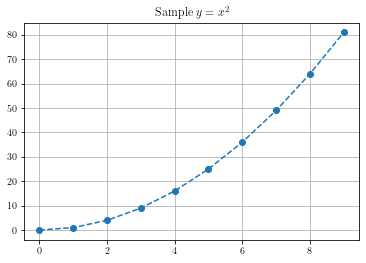

In [15]:
set_latex_fonts(show_sample=True)

In [3]:
output_dir = join(REPO_PATH, "outputs")

In [27]:
methods = ["random", "clip-unimodal", "clip"]

method2name = {
    "random": "Random",
    "clip-unimodal": "CLIP-Unimodal",
    "clip": "CLIP",
}


In [28]:
i2t_results = {m: torch.load(join(output_dir, f"{m}_on_PNG_image2text_metrics.pt")) for m in methods}
t2i_results = {m: torch.load(join(output_dir, f"{m}_on_PNG_text2image_metrics.pt")) for m in methods}

In [29]:
i2t_results.keys()

dict_keys(['random', 'clip-unimodal', 'clip'])

In [30]:
i2t_results["random"]["average_metrics"]["iou"]

0.25571540661114345

## Plot

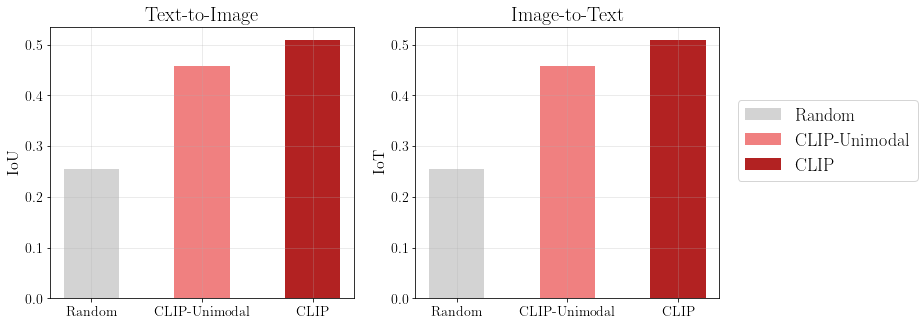

In [64]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

titlesize = 20
legendsize = 18
labelsize = 16
tickssize = 14
colors = ["lightgray", "lightcoral", "firebrick"]

ax = axes[0]
ax.grid(alpha=0.3)
ax.set_title("Text-to-Image", fontsize=titlesize)
ax.set_ylabel("IoU", fontsize=labelsize)

legend_values = [method2name[m] for m in methods]
y_values = [i2t_results[m]["average_metrics"]["iou"] for m in methods]
ax.bar(np.arange(len(legend_values)), y_values, width=0.5, color=colors)
ax.set_xticks(np.arange(len(legend_values)), legend_values, fontsize=tickssize)
ax.tick_params(axis='y', labelsize=tickssize)


ax = axes[1]
ax.grid(alpha=0.3)
ax.set_title("Image-to-Text", fontsize=titlesize)
ax.set_ylabel("IoT", fontsize=labelsize)

legend_values = [method2name[m] for m in methods]
y_values = [i2t_results[m]["average_metrics"]["iou"] for m in methods]
ax.bar(np.arange(len(legend_values)), y_values, width=0.5, color=colors)
ax.set_xticks(np.arange(len(legend_values)), legend_values, fontsize=tickssize)
ax.tick_params(axis='y', labelsize=tickssize)

legend_elements = [Patch(facecolor=c) for c in colors]
# ax.legend(handles=legend_elements, loc='center')
fig.legend(legend_elements, legend_values, bbox_to_anchor=(1.14, 0.7), fontsize=legendsize)

plt.savefig("../outputs/results-v1.pdf", bbox_inches="tight")
plt.show()